### ¿Qué es un problema de Regresión?

En ciencia de datos y aprendizaje automático, un **problema de regresión** ocurre cuando el objetivo es predecir un **valor continuo** (un número real).

**Características principales:**
* **Entrada (X):** Una o varias variables independientes (características).
* **Salida (y):** Una variable dependiente numérica (ej. precio, temperatura, edad, ventas).
* **Objetivo:** Encontrar una función matemática que mejor se ajuste a los datos históricos para poder realizar predicciones sobre datos nuevos.

**Ejemplos comunes:**
1. Predecir el precio de una casa basándose en sus metros cuadrados.
2. Estimar la demanda de un producto para el próximo mes.
3. Predecir el grado de alcohol en un vino (como en el código anterior) basándose en su composición química.

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


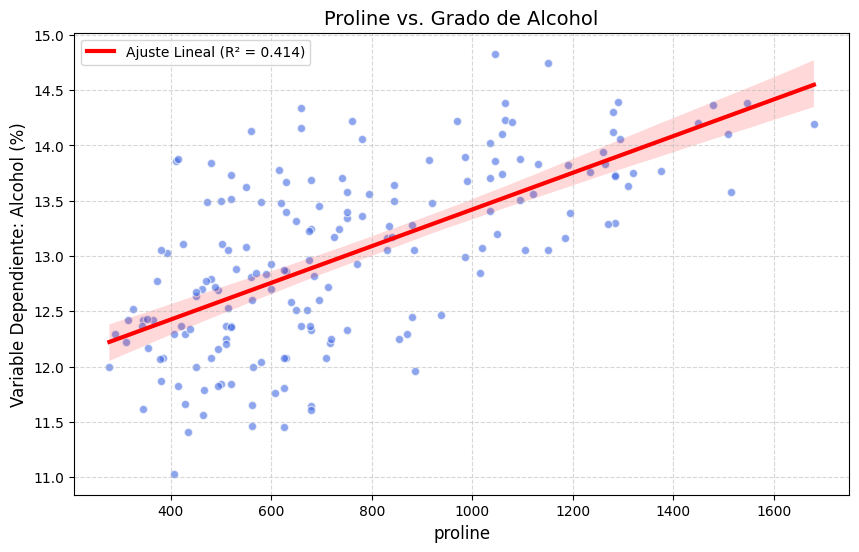

El valor de R-cuadrado con PCA es: 0.4144


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Cargar el dataset Wine
wine = load_wine()
print(wine.feature_names)
X_full = pd.DataFrame(wine.data, columns=wine.feature_names)
y_alcohol = X_full['alcohol']

# 2. Variables Independientes (Todas menos alcohol)
X_independent = X_full.drop(columns=['alcohol'])
X_independent = X_full[['proline']] # Corrected: Select 'color_intensity' as a DataFrame

# 3. Calcular la Regresión y el R²
model = LinearRegression()
model.fit(X_independent, y_alcohol)
r2 = r2_score(y_alcohol, model.predict(X_independent))

# 4. Gráfica de la Diapositiva
plt.figure(figsize=(10, 6))
sns.regplot(x=X_independent.values.flatten(), y=y_alcohol, # Corrected: Access values and then flatten for plotting
            scatter_kws={'alpha':0.6, 'color':'royalblue', 'edgecolor':'w'},
            line_kws={'color':'red', 'lw':3, 'label': f'Ajuste Lineal (R² = {r2:.3f})'})

plt.title('Proline vs. Grado de Alcohol', fontsize=14)
plt.xlabel('proline', fontsize=12)
plt.ylabel('Variable Dependiente: Alcohol (%)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


In [ ]:
# Calcular la matriz de correlación completa
correlation_matrix = X_full.corr()

# Obtener las correlaciones con la variable 'alcohol'
alcohol_correlations = correlation_matrix['alcohol'].sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlación de cada variable con el contenido de alcohol:")
print(alcohol_correlations)

Correlación de cada variable con el contenido de alcohol:
alcohol                         1.000000
proline                         0.643720
color_intensity                 0.546364
total_phenols                   0.289101
magnesium                       0.270798
flavanoids                      0.236815
ash                             0.211545
proanthocyanins                 0.136698
malic_acid                      0.094397
od280/od315_of_diluted_wines    0.072343
hue                            -0.071747
nonflavanoid_phenols           -0.155929
alcalinity_of_ash              -0.310235
Name: alcohol, dtype: float64
